# Fully Connected Neural Networks in TensorFlow's Keras


We will use dense neural networks in Keras to solve a simple regression problem. 

The dataset is a collection of simulated particle events from [Pythia](http://home.thep.lu.se/~torbjorn/Pythia.html). Specifically, we will construct a dense neural network which will learn how to calculate the invariant mass of a particle from its energy and momentum.

First, import `numpy`, `tensorflow`, and `pylab` and load the data.


In [40]:
import numpy as np
import tensorflow as tf
import pylab as plt

In [41]:
# load the data, which is stored as a numpy array data type
energy = np.load("./data/homogenous-16-particle-events-energy.npy")
print(energy.shape)

(35916, 80)


The dataset is a 2D array where each row represents one event of data from an electron-proton collision. This dataset is comprised _only_ of events where there were exactly 16 particles produced from an electron-proton collision. Each particle has an x-momentum, y-momentum, z-momentum, energy, and charge: $(p_x,p_y,p_z,E,q)$. Each event is therefore represented by 80 numbers. Using numpy's reshape method we can make each row represent one particle. 

In [42]:
# Here we rearrange the data within each of the events to isolate particles
energy = np.reshape(energy, (len(energy), 16, 5))
print(energy.shape)

# Use another call of reshape to combine all events
# Complete me:
# Target: (#events*16, 5)
energy = np.reshape(energy, (len(energy)*16, 5))
print(energy.shape)

(35916, 16, 5)
(574656, 5)


These are our training data inputs, but we also must provide the targets, which are the invariant masses of each particle. This is a straightforward computation that does not require neural networks, but provides an easy-to-understand problem.

We choose units where $c = 1$:
$$m^2=E^2-||\textbf{p}||^2$$
where $m, E$, and $\textbf{p}$ are all in GeV.

In [43]:
# Complete me:
p2 = energy[:,0]**2 + energy[:,1]**2 + energy[:,2]**2
mass = np.sqrt(np.maximum(energy[:,3]**2 - p2,0))
print(mass.shape)

(574656,)


There are several hundred thousand datapoints in this dataset which is overkill for this simple example. Create a test dataset with just 50 examples. (We're deliberately overcompensating here and making the dataset unreasonably small, to highlight some learning failure modes. Later in this notebook, we'll use all of the data.)

In [44]:
#Slicing allows you select a subset of an array.
#This can be done like this: smallerArray = largerArray[:1000]

# Complete me:
energy_subset = energy[:50]
mass_subset = mass[:50]

Next, make a histogram of the target data to make sure that we are seeing masses of real particles. As this data has limited precision, this will not resolve electrons very well, but protons, pions, and massless particles should be clearly visible.

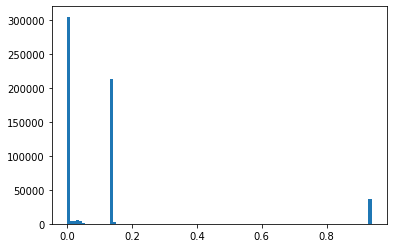

In [45]:
plt.hist(mass,bins=100)
plt.show()

Now we can build and train the first neural network. Start with a simple one hidden layer network with 5 neurons, and ReLU activation. Train for 30 epochs with a batch size of 50, an Adam optimizer with a learning rate of 0.1, using mean squared error loss. 

Use a standard validation split of 0.2 (i.e., 80% of the data will be used for training, the other 20% for validation).

Information on how to implement these features can be found here:
<https://www.tensorflow.org/api_docs/python/tf/keras>.
Check out Sequential underneath models and Dense under layers.


In [46]:
model = tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(5, input_shape=(5,), activation="relu")) #Add the hidden layer

#Add the output layer yourself
#It should not have an activation function
#Complete me:
model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.Adam(lr=0.1),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(energy_subset, mass_subset, epochs=30, batch_size=50, validation_split=0.2)

Epoch 1/30
1/1 [==============================] - 0s 211ms/step - loss: 10.6317 - val_loss: 12.5110
Epoch 2/30
1/1 [==============================] - 0s 13ms/step - loss: 2.5098 - val_loss: 5.7385
Epoch 3/30
1/1 [==============================] - 0s 14ms/step - loss: 1.8398 - val_loss: 2.4988
Epoch 4/30
1/1 [==============================] - 0s 15ms/step - loss: 1.6972 - val_loss: 1.1089
Epoch 5/30
1/1 [==============================] - 0s 14ms/step - loss: 1.1687 - val_loss: 0.5661
Epoch 6/30
1/1 [==============================] - 0s 14ms/step - loss: 0.6747 - val_loss: 0.3773
Epoch 7/30
1/1 [==============================] - 0s 14ms/step - loss: 0.3773 - val_loss: 0.3220
Epoch 8/30
1/1 [==============================] - 0s 13ms/step - loss: 0.2480 - val_loss: 0.2903
Epoch 9/30
1/1 [==============================] - 0s 15ms/step - loss: 0.1987 - val_loss: 0.2541
Epoch 10/30
1/1 [==============================] - 0s 14ms/step - loss: 0.1783 - val_loss: 0.2244
Epoch 11/30
1/1 [=========

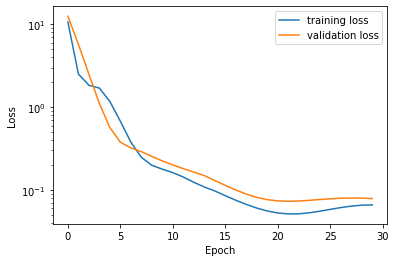

In [47]:
def plot_learning_curve(history):
    """ Function that accepts the result from a training run and generates loss curves. """
    plt.plot(history["loss"], label="training loss")
    plt.plot(history["val_loss"], label="validation loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.yscale('log')
    plt.legend()
    plt.show()

plot_learning_curve(results.history)

The model is learning, but we can do better. Perhaps we did not have enough model parameters to accurately represent the mapping. Remedy this by increasing the number of hidden neurons to 20.

Epoch 1/30
1/1 [==============================] - 0s 202ms/step - loss: 5.6368 - val_loss: 1.1598
Epoch 2/30
1/1 [==============================] - 0s 14ms/step - loss: 3.8883 - val_loss: 0.9232
Epoch 3/30
1/1 [==============================] - 0s 14ms/step - loss: 3.2759 - val_loss: 0.3949
Epoch 4/30
1/1 [==============================] - 0s 14ms/step - loss: 0.7959 - val_loss: 0.2017
Epoch 5/30
1/1 [==============================] - 0s 15ms/step - loss: 0.0698 - val_loss: 0.1894
Epoch 6/30
1/1 [==============================] - 0s 14ms/step - loss: 0.3476 - val_loss: 0.1826
Epoch 7/30
1/1 [==============================] - 0s 15ms/step - loss: 0.6609 - val_loss: 0.1336
Epoch 8/30
1/1 [==============================] - 0s 14ms/step - loss: 0.7156 - val_loss: 0.0710
Epoch 9/30
1/1 [==============================] - 0s 14ms/step - loss: 0.5809 - val_loss: 0.0397
Epoch 10/30
1/1 [==============================] - 0s 13ms/step - loss: 0.3923 - val_loss: 0.0590
Epoch 11/30
1/1 [===========

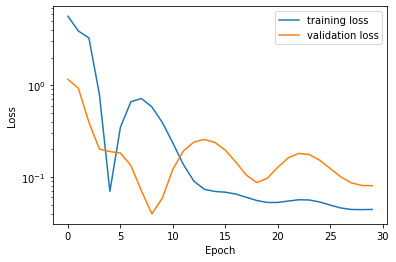

In [48]:
#Use the same code as in the previous cells
#Simply change the number of neurons in the hidden layer

model = tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="relu")) #Add the hidden layer

#Add the output layer yourself
#It should not have an activation function
#Complete me:
model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.Adam(lr=0.1),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(energy_subset, mass_subset, epochs=30, batch_size=50, validation_split=0.2)
plot_learning_curve(results.history)

We see that we got little improvement here. Another hyperparameter to adjust is *batch size*, which is the number of training examples used to calculate the gradient on each step. While you may initially think that a higher batch size leads to faster or more accurate training, in practice this is not true. The "noise" that arises from using less training examples at each iteration can actually help find the global minimum of the loss function.
(See here for more info: https://arxiv.org/pdf/1609.04836.pdf)

Try decreasing the batch size to 16.

Epoch 1/30
3/3 [==============================] - 0s 31ms/step - loss: 3.2451 - val_loss: 4.3915
Epoch 2/30
3/3 [==============================] - 0s 7ms/step - loss: 7.3412 - val_loss: 1.9274
Epoch 3/30
3/3 [==============================] - 0s 7ms/step - loss: 0.7670 - val_loss: 0.9164
Epoch 4/30
3/3 [==============================] - 0s 7ms/step - loss: 0.2969 - val_loss: 0.2296
Epoch 5/30
3/3 [==============================] - 0s 7ms/step - loss: 0.2912 - val_loss: 0.4837
Epoch 6/30
3/3 [==============================] - 0s 8ms/step - loss: 0.2007 - val_loss: 0.1597
Epoch 7/30
3/3 [==============================] - 0s 8ms/step - loss: 0.0788 - val_loss: 0.0568
Epoch 8/30
3/3 [==============================] - 0s 8ms/step - loss: 0.1205 - val_loss: 0.0606
Epoch 9/30
3/3 [==============================] - 0s 7ms/step - loss: 0.1136 - val_loss: 0.0615
Epoch 10/30
3/3 [==============================] - 0s 7ms/step - loss: 0.0756 - val_loss: 0.0873
Epoch 11/30
3/3 [=====================

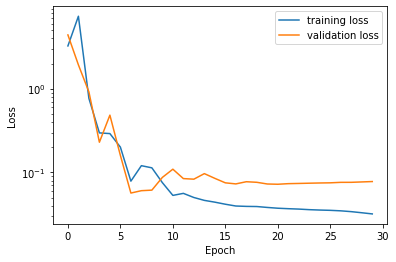

In [49]:
#Complete me:
model = tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="relu")) #Add the hidden layer

#Add the output layer yourself
#It should not have an activation function
#Complete me:
model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.Adam(lr=0.1),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(energy_subset, mass_subset, epochs=30, batch_size=16, validation_split=0.2)
plot_learning_curve(results.history)

This is starting to do better but there is significant room for improvement.

Another hyperparameter to tune is the *learning rate*. 

 - If the learning rate is too high, we are taking too large of a step in the gradient descent at each iteration and may have difficulty converging to a minimium. 
 - If the learning rate is too small, then we are not traveling far enough in each iteration and we will take far too long to reach a minimum. 

Perhaps the learning rate is too high and the network can't fine tune. Try decreasing the learning rate to 0.001. With such a reduction in learning rate, you will typically need to also train for more longer to attain convergence --- you may want to double the number of epochs of training to 60 (or possibly more).

Epoch 1/30
1/1 [==============================] - 0s 210ms/step - loss: 3.0611 - val_loss: 1.0257
Epoch 2/30
1/1 [==============================] - 0s 14ms/step - loss: 2.9592 - val_loss: 0.9707
Epoch 3/30
1/1 [==============================] - 0s 15ms/step - loss: 2.8594 - val_loss: 0.9177
Epoch 4/30
1/1 [==============================] - 0s 13ms/step - loss: 2.7619 - val_loss: 0.8665
Epoch 5/30
1/1 [==============================] - 0s 14ms/step - loss: 2.6666 - val_loss: 0.8172
Epoch 6/30
1/1 [==============================] - 0s 14ms/step - loss: 2.5736 - val_loss: 0.7697
Epoch 7/30
1/1 [==============================] - 0s 13ms/step - loss: 2.4829 - val_loss: 0.7241
Epoch 8/30
1/1 [==============================] - 0s 14ms/step - loss: 2.3945 - val_loss: 0.6803
Epoch 9/30
1/1 [==============================] - 0s 14ms/step - loss: 2.3043 - val_loss: 0.6382
Epoch 10/30
1/1 [==============================] - 0s 13ms/step - loss: 2.2157 - val_loss: 0.5979
Epoch 11/30
1/1 [===========

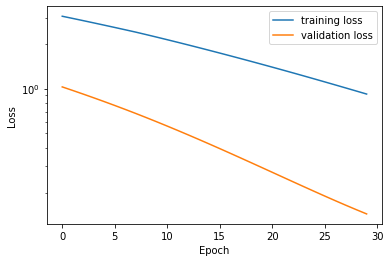

In [50]:
#Reuse the code from the previous cells and change the appropriate hyperparameters
#Complete me:
model = tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="relu")) #Add the hidden layer

model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(energy_subset, mass_subset, epochs=30, batch_size=50, validation_split=0.2)
plot_learning_curve(results.history)

While the learning curves have now gotten smoother, you may have noticed that the performance (particularly on the held out validation set) is not that much better. Indeed, there is now evidence of *overtraining* or *overfitting* -- the training loss is so much lower than the validation loss. 

One common fix to this is adding *dropout layers*, that serve as a form of regularization. Try adding a dropout layer with a dropout rate of 0.05. <https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout>

You can also try batch normalization: <https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization>

Epoch 1/30
3/3 [==============================] - 0s 32ms/step - loss: 1.7087 - val_loss: 5.7981
Epoch 2/30
3/3 [==============================] - 0s 7ms/step - loss: 1.4209 - val_loss: 5.1775
Epoch 3/30
3/3 [==============================] - 0s 7ms/step - loss: 1.4006 - val_loss: 4.5868
Epoch 4/30
3/3 [==============================] - 0s 7ms/step - loss: 1.4274 - val_loss: 4.0474
Epoch 5/30
3/3 [==============================] - 0s 7ms/step - loss: 0.9122 - val_loss: 3.5480
Epoch 6/30
3/3 [==============================] - 0s 7ms/step - loss: 1.3508 - val_loss: 3.1342
Epoch 7/30
3/3 [==============================] - 0s 8ms/step - loss: 0.8102 - val_loss: 2.7779
Epoch 8/30
3/3 [==============================] - 0s 7ms/step - loss: 0.9577 - val_loss: 2.4544
Epoch 9/30
3/3 [==============================] - 0s 7ms/step - loss: 1.0436 - val_loss: 2.1500
Epoch 10/30
3/3 [==============================] - 0s 7ms/step - loss: 0.4550 - val_loss: 1.8774
Epoch 11/30
3/3 [=====================

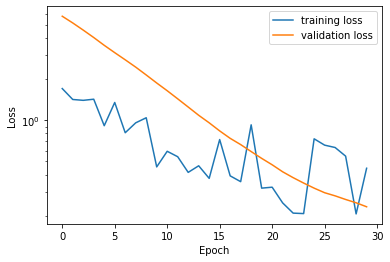

In [51]:
#Dropout layers are located under tf.keras.layers. 
#They take the dropout rate as their only argument.
#BatchNormalization layers are also under tf.keras.layers, and in the simplest use case, take no arguments

#Complete me:
model = tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dropout(0.05))

model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(energy_subset, mass_subset, epochs=30, batch_size=16, validation_split=0.2)
plot_learning_curve(results.history)


While this has somewhat closed the gap between the two loss curves, the performance is still unsatisfactory. Let's now try training on the full dataset. Use a single hidden layer with 20 neurons, a learning rate of 0.001, and a batch size of 256. You can eliminate the Dropout layer, since using more data already has a regularizing effect. Train it for just 10 epochs to keep the runtime shorter.

Epoch 1/10
1796/1796 [==============================] - 1s 616us/step - loss: 0.0384 - val_loss: 0.0123
Epoch 2/10
1796/1796 [==============================] - 1s 588us/step - loss: 0.0108 - val_loss: 0.0096
Epoch 3/10
1796/1796 [==============================] - 1s 583us/step - loss: 0.0089 - val_loss: 0.0083
Epoch 4/10
1796/1796 [==============================] - 1s 583us/step - loss: 0.0080 - val_loss: 0.0075
Epoch 5/10
1796/1796 [==============================] - 1s 603us/step - loss: 0.0071 - val_loss: 0.0067
Epoch 6/10
1796/1796 [==============================] - 1s 583us/step - loss: 0.0062 - val_loss: 0.0058
Epoch 7/10
1796/1796 [==============================] - 1s 590us/step - loss: 0.0056 - val_loss: 0.0053
Epoch 8/10
1796/1796 [==============================] - 1s 585us/step - loss: 0.0053 - val_loss: 0.0051
Epoch 9/10
1796/1796 [==============================] - 1s 591us/step - loss: 0.0051 - val_loss: 0.0050
Epoch 10/10
1796/1796 [==============================] - 1s 582u

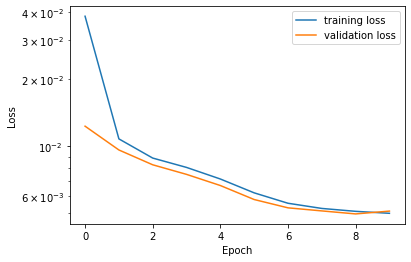

In [52]:
#Complete me:
model = tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(1))                     # output layer

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(energy, mass, epochs=10, batch_size=256, validation_split=0.2)
plot_learning_curve(results.history)

This clearly resulted in a significant improvement and shows how important having a large enough dataset is. Let's see if we can do even better by increasing *model capacity*, i.e., by building a neural network with more nodes, and thus, training a model with more parameters. Add 2 more hidden layers to the network, while fixing all other hyperparameters. How does the performance compare to the shallower model?

Epoch 1/10
1796/1796 [==============================] - 2s 830us/step - loss: 0.0087 - val_loss: 0.0017
Epoch 2/10
1796/1796 [==============================] - 1s 760us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 3/10
1796/1796 [==============================] - 1s 764us/step - loss: 9.6941e-04 - val_loss: 7.9280e-04
Epoch 4/10
1796/1796 [==============================] - 1s 760us/step - loss: 7.9183e-04 - val_loss: 7.9688e-04
Epoch 5/10
1796/1796 [==============================] - 1s 773us/step - loss: 6.1012e-04 - val_loss: 7.5103e-04
Epoch 6/10
1796/1796 [==============================] - 1s 759us/step - loss: 5.3970e-04 - val_loss: 3.6750e-04
Epoch 7/10
1796/1796 [==============================] - 1s 759us/step - loss: 4.7551e-04 - val_loss: 5.2377e-04
Epoch 8/10
1796/1796 [==============================] - 1s 762us/step - loss: 4.2213e-04 - val_loss: 4.5574e-04
Epoch 9/10
1796/1796 [==============================] - 1s 764us/step - loss: 4.0003e-04 - val_loss: 5.2811e-04
Epoch 10

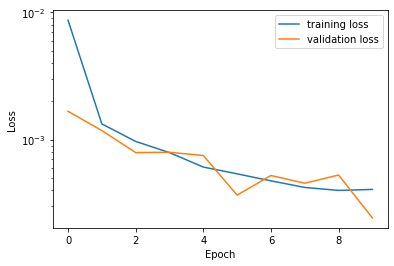

In [53]:
#Complete me:
model = tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="relu")) #Add the hidden layer

model.add(tf.keras.layers.Dense(20, activation="relu")) # second hidden layer
model.add(tf.keras.layers.Dense(20, activation="relu")) # third hidden layer
model.add(tf.keras.layers.Dense(1))                     # output layer

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(energy, mass, epochs=10, batch_size=256, validation_split=0.2)
plot_learning_curve(results.history)

Clearly, adding more layers helps improve the quality of the network. But there is a limit to how effective this is though. What happens with 5 hidden layers?

Epoch 1/10
1796/1796 [==============================] - 2s 935us/step - loss: 0.0064 - val_loss: 0.0013
Epoch 2/10
1796/1796 [==============================] - 2s 900us/step - loss: 0.0010 - val_loss: 6.5225e-04
Epoch 3/10
1796/1796 [==============================] - 2s 896us/step - loss: 8.1547e-04 - val_loss: 4.7079e-04
Epoch 4/10
1796/1796 [==============================] - 2s 906us/step - loss: 6.6963e-04 - val_loss: 3.1321e-04
Epoch 5/10
1796/1796 [==============================] - 2s 897us/step - loss: 6.7729e-04 - val_loss: 0.0020
Epoch 6/10
1796/1796 [==============================] - 2s 891us/step - loss: 6.6711e-04 - val_loss: 3.8317e-04
Epoch 7/10
1796/1796 [==============================] - 2s 898us/step - loss: 5.5724e-04 - val_loss: 4.2954e-04
Epoch 8/10
1796/1796 [==============================] - 2s 901us/step - loss: 6.5660e-04 - val_loss: 2.7227e-04
Epoch 9/10
1796/1796 [==============================] - 2s 899us/step - loss: 5.3815e-04 - val_loss: 0.0011
Epoch 10/10


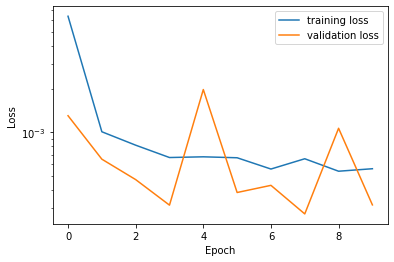

In [54]:
#Complete me:
#Complete me:
model = tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="relu")) #Add the hidden layer

model.add(tf.keras.layers.Dense(20, activation="relu")) # second hidden layer
model.add(tf.keras.layers.Dense(20, activation="relu")) # third hidden layer
model.add(tf.keras.layers.Dense(20, activation="relu")) # forth hidden layer
model.add(tf.keras.layers.Dense(20, activation="relu")) # fifth hidden layer
model.add(tf.keras.layers.Dense(1))                     # output layer

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(energy, mass, epochs=10, batch_size=256, validation_split=0.2)
plot_learning_curve(results.history)

Alternately, we can also experiment with the "width" of each hidden layer. What happens when you increase the number of neurons per layer to 50 in the 3 hidden layer model? Compare the performance to the previous model with 3 layers that used only 20 nodes in each layer. 

Epoch 1/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0035 - val_loss: 7.9418e-04
Epoch 2/10
1796/1796 [==============================] - 2s 1ms/step - loss: 6.5394e-04 - val_loss: 4.1553e-04
Epoch 3/10
1796/1796 [==============================] - 2s 1ms/step - loss: 4.8917e-04 - val_loss: 3.3331e-04
Epoch 4/10
1796/1796 [==============================] - 2s 996us/step - loss: 4.5748e-04 - val_loss: 2.7634e-04
Epoch 5/10
1796/1796 [==============================] - 2s 987us/step - loss: 3.7228e-04 - val_loss: 4.5171e-04
Epoch 6/10
1796/1796 [==============================] - 2s 1ms/step - loss: 3.8067e-04 - val_loss: 3.1220e-04
Epoch 7/10
1796/1796 [==============================] - 2s 993us/step - loss: 3.8663e-04 - val_loss: 1.9907e-04
Epoch 8/10
1796/1796 [==============================] - 2s 986us/step - loss: 3.6185e-04 - val_loss: 2.3353e-04
Epoch 9/10
1796/1796 [==============================] - 2s 1ms/step - loss: 3.5357e-04 - val_loss: 3.0399e-04
Epoch 

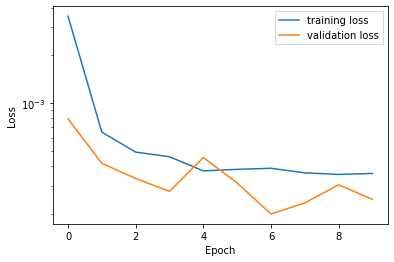

In [55]:
#Complete me:
model = tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(50, input_shape=(5,), activation="relu")) #Add the hidden layer

model.add(tf.keras.layers.Dense(50, activation="relu")) # second hidden layer
model.add(tf.keras.layers.Dense(50, activation="relu")) # third hidden layer
model.add(tf.keras.layers.Dense(1))                     # output layer

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(energy, mass, epochs=10, batch_size=256, validation_split=0.2)
plot_learning_curve(results.history)

Let's now experiment with other activation functions. Try the sigmoid and the tanh activation functions, and in particular, see how well they perform with deep architectures (when compared to ReLU). Build a network with between 1--8 hidden layers with 50 nodes each. How does network performance vary as you change the number of hidden layers? Pay particular attention to the rate of convergence of the loss.

Epoch 1/10
1796/1796 [==============================] - 3s 2ms/step - loss: 0.0182 - val_loss: 0.0074
Epoch 2/10
1796/1796 [==============================] - 3s 2ms/step - loss: 0.0052 - val_loss: 0.0026
Epoch 3/10
1796/1796 [==============================] - 3s 2ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 4/10
1796/1796 [==============================] - 3s 2ms/step - loss: 0.0016 - val_loss: 9.3349e-04
Epoch 5/10
1796/1796 [==============================] - 3s 2ms/step - loss: 0.0014 - val_loss: 6.9075e-04
Epoch 6/10
1796/1796 [==============================] - 3s 2ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 7/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0015 - val_loss: 8.1096e-04
Epoch 8/10
1796/1796 [==============================] - 3s 2ms/step - loss: 0.0010 - val_loss: 0.0057
Epoch 9/10
1796/1796 [==============================] - 3s 2ms/step - loss: 0.0013 - val_loss: 9.4760e-04
Epoch 10/10
1796/1796 [==============================] - 3s 2ms/st

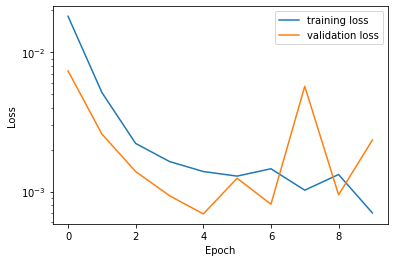

In [56]:
#Simply replace "relu" with "sigmoid" or "tanh" to try other activation functions
#Complete me:
model = tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(50, input_shape=(5,), activation="sigmoid")) #Add the hidden layer

model.add(tf.keras.layers.Dense(50, activation="sigmoid")) # second hidden layer
model.add(tf.keras.layers.Dense(50, activation="sigmoid")) # third hidden layer
model.add(tf.keras.layers.Dense(50, activation="sigmoid")) # fourth hidden layer
model.add(tf.keras.layers.Dense(50, activation="sigmoid")) # fifth hidden layer
model.add(tf.keras.layers.Dense(50, activation="sigmoid")) # sixth hidden layer
model.add(tf.keras.layers.Dense(50, activation="sigmoid")) # seventh hidden layer
model.add(tf.keras.layers.Dense(50, activation="sigmoid")) # eighth hidden layer
model.add(tf.keras.layers.Dense(1))                     # output layer

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(energy, mass, epochs=10, batch_size=256, validation_split=0.2)
plot_learning_curve(results.history)

This difference in performance, especially when the sigmoid function is used in deeper networks, is caused by what's known as the vanishing gradient problem. If the value for any one the neurons gets too far away from 0, the gradient for sigmoid and tanh gets really close to 0. This means that for deeper networks it is much more difficult to update the weights in the earlier layers as their gradient is so small. Now, remove the fifth column from the input data, the charge, and see what happens when training (you may want to revert to the three-layer ReLU model for this). Why do you think including charge has such a large impact?

Epoch 1/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0146 - val_loss: 0.0040
Epoch 2/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 3/10
1796/1796 [==============================] - 2s 976us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 4/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 5/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 6/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 7/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 8/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 9/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 10/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0

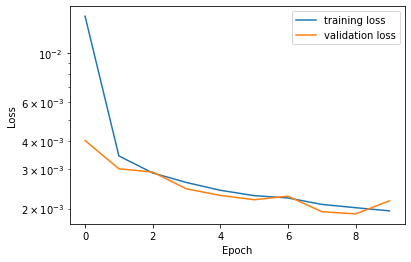

In [57]:
#Complete me:
noCharge = energy[:, :-1]
model = tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(50, input_shape=(4,), activation="relu")) #Add the hidden layer

model.add(tf.keras.layers.Dense(50, activation="relu")) # second hidden layer
model.add(tf.keras.layers.Dense(50, activation="relu")) # third hidden layer
model.add(tf.keras.layers.Dense(1))                     # output layer

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(noCharge, mass, epochs=10, batch_size=256, validation_split=0.2)
plot_learning_curve(results.history)


Finally, there are other options for the loss function. Try experimenting with alternatives to mean squared error.

<https://www.tensorflow.org/api_docs/python/tf/keras/losses>

You can also try some other optimizers -- for example, sgd (with and without momentum), rmsprop, adagrad, adadelta, adamax, and nadam. <https://www.tensorflow.org/api_docs/python/tf/keras/optimizers>



Epoch 1/10
   1/1796 [..............................] - ETA: 4:47 - loss: 0.2656

/home/thuy/.local/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


1796/1796 [==============================] - 2s 1ms/step - loss: 0.0358 - val_loss: 0.0231
Epoch 2/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0194 - val_loss: 0.0167
Epoch 3/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0152 - val_loss: 0.0139
Epoch 4/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0131 - val_loss: 0.0124
Epoch 5/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0119 - val_loss: 0.0114
Epoch 6/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0111 - val_loss: 0.0108
Epoch 7/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0105 - val_loss: 0.0103
Epoch 8/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0101 - val_loss: 0.0099
Epoch 9/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0098 - val_loss: 0.0096
Epoch 10/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0095 - val_los

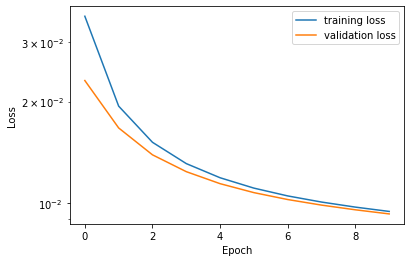

In [59]:
#Complete me:
model = tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(50, input_shape=(5,), activation="relu")) #Add the hidden layer

model.add(tf.keras.layers.Dense(50, activation="relu")) # second hidden layer
model.add(tf.keras.layers.Dense(50, activation="relu")) # third hidden layer
model.add(tf.keras.layers.Dense(1))                     # output layer

model.compile(tf.keras.optimizers.SGD(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(energy, mass, epochs=10, batch_size=256, validation_split=0.2)
plot_learning_curve(results.history)